# Machine Learning 2nd Assignment 

In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, plot_model
import keras.layers as l
import keras.models as m
import keras.optimizers as o
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.utils import get_custom_objects
from keras.layers import Activation
from tqdm import tqdm
import pandas as pd 
import os

# Exercise 1

### First Task

#### Relu activation function - General Form of Backpropagation Equations

In [2]:
import numpy as np
class Βackprop_Network:
    def __init__(self, network_schema):
        self.network_schema = network_schema
        self.number_of_layers = len(network_schema) 
        self.Bn = [np.random.randn(l, 1) for l in network_schema[1:]]   
        self.Wn = [np.random.randn(l, next_l) for l, next_l in zip(network_schema[:-1], network_schema[1:])]
        
    def backprop(self, x, y):        
        მJⳆმBns = [np.zeros(b.shape) for b in self.Bn]
        მJⳆმWns = [np.zeros(W.shape) for W in self.Wn]

        Zn = [] 
        An = [] 
        for b, W in zip(self.Bn, self.Wn):
            z = W.T @ a + b if Zn else W.T @ x + b
            a = f(z)
            Zn.append(z)
            An.append(a)
        
        H = self.number_of_layers-2
        for L in range(H, -1, -1):
            δ =  f_prime(Zn[L]) * (self.Wn[L+1] @ δ) if L != H else e(An[L], y) * f_prime(Zn[L])
            მJⳆმBns[L] = δ
            მJⳆმWns[L] = An[L-1] @ δ.T if L != 0 else x @ δ.T
        
        return (მJⳆმBns, მJⳆმWns)
    
    def gradient_descent(self, mini_batch, factor):
        მJⳆმBn= [np.zeros(b.shape) for b in self.Bn]
        მJⳆმWn = [np.zeros(W.shape) for W in self.Wn]

        for x, y in mini_batch:
            მJⳆმBns, მJⳆმWns = self.backprop(x, y)
            მJⳆმBn = [მJⳆმb + მJⳆმbs for მJⳆმb, მJⳆმbs in zip(მJⳆმBn, მJⳆმBns)]  
            მJⳆმWn = [მJⳆმW + მJⳆმWs for მJⳆმW, მJⳆმWs in zip(მJⳆმWn, მJⳆმWns)]

        mini_batch_len = len(mini_batch)
        self.Wn = [W - factor/mini_batch_len * მJⳆმW for W, მJⳆმW in zip(self.Wn, მJⳆმWn)]
        self.Bn = [b - factor/mini_batch_len * მJⳆმb for b, მJⳆმb in zip(self.Bn, მJⳆმBn)]    

def e(an, y):    
    return (an-y)                 #so we can easily change the cost.


def f(z):
    return np.maximum(0, z)


def f_prime(z):
    return np.where(z <= 0, 0, 1)


backpropagation_network = Βackprop_Network([3, 2 ,2])
print("Initial Weights:")
print(backpropagation_network.Wn[0])
#the following generates a list of cnt vectors of length dim.
random_vectors = lambda dim, cnt: [np.random.rand(dim, 1) for i in range(cnt)]
random_batch= list(zip(random_vectors(3, 64) , random_vectors(2, 64)))
backpropagation_network.gradient_descent(random_batch, 3.0)
print("Optimized Weights:")
print(backpropagation_network.Wn[0])

Initial Weights:
[[ 1.30013544  0.82486035]
 [ 0.39610636 -0.41409883]
 [-0.80682699 -0.99237241]]
Optimized Weights:
[[-4.23134081  0.36460619]
 [-3.44628631 -0.70213802]
 [-3.48054609 -1.18127168]]


The range of the gradients for ReLU activation function is [0, infinity) for positive inputs and [0, 1] for negative inputs

#### Sigmoid activation function - General Form of Backpropagation Equations

In [3]:
import numpy as np
class Βackprop_Network:
    def __init__(self, network_schema):
        self.network_schema = network_schema
        self.number_of_layers = len(network_schema) 
        self.Bn = [np.random.randn(l, 1) for l in network_schema[1:]]   
        self.Wn = [np.random.randn(l, next_l) for l, next_l in zip(network_schema[:-1], network_schema[1:])]
        
    def backprop(self, x, y):        
        მJⳆმBns = [np.zeros(b.shape) for b in self.Bn]
        მJⳆმWns = [np.zeros(W.shape) for W in self.Wn]

        Zn = [] 
        An = [] 
        for b, W in zip(self.Bn, self.Wn):
            z = W.T @ a + b if Zn else W.T @ x + b
            a = f(z)
            Zn.append(z)
            An.append(a)
        
        H = self.number_of_layers-2
        for L in range(H, -1, -1):
            δ =  f_prime(Zn[L]) * (self.Wn[L+1] @ δ) if L != H else e(An[L], y) * f_prime(Zn[L])
            მJⳆმBns[L] = δ
            მJⳆმWns[L] = An[L-1] @ δ.T if L != 0 else x @ δ.T
        
        return (მJⳆმBns, მJⳆმWns)
    
    def gradient_descent(self, mini_batch, factor):
        მJⳆმBn= [np.zeros(b.shape) for b in self.Bn]
        მJⳆმWn = [np.zeros(W.shape) for W in self.Wn]

        for x, y in mini_batch:
            მJⳆმBns, მJⳆმWns = self.backprop(x, y)
            მJⳆმBn = [მJⳆმb + მJⳆმbs for მJⳆმb, მJⳆმbs in zip(მJⳆმBn, მJⳆმBns)]  
            მJⳆმWn = [მJⳆმW + მJⳆმWs for მJⳆმW, მJⳆმWs in zip(მJⳆმWn, მJⳆმWns)]

        mini_batch_len = len(mini_batch)
        self.Wn = [W - factor/mini_batch_len * მJⳆმW for W, მJⳆმW in zip(self.Wn, მJⳆმWn)]
        self.Bn = [b - factor/mini_batch_len * მJⳆმb for b, მJⳆმb in zip(self.Bn, მJⳆმBn)]

def e(an, y):    
    return (an-y)                 #so we can easily change the cost.


def f(z):
    return 1.0/(1.0+np.exp(-z))


def f_prime(z):
    return f(z)*(1-f(z))


backpropagation_network = Βackprop_Network([3, 2 ,2])
print("Initial Weights:")
print(backpropagation_network.Wn[0])
#the following generates a list of cnt vectors of length dim.
random_vectors = lambda dim, cnt: [np.random.rand(dim, 1) for i in range(cnt)]
random_batch= list(zip(random_vectors(3, 64) , random_vectors(2, 64)))
backpropagation_network.gradient_descent(random_batch, 3.0)
print("Optimized Weights:")
print(backpropagation_network.Wn[0])

Initial Weights:
[[-1.03208103  1.36357549]
 [-0.59608372 -0.24391357]
 [-1.34458466  0.74213407]]
Optimized Weights:
[[-1.00852147  1.36096503]
 [-0.57484753 -0.24445791]
 [-1.31962641  0.7378568 ]]


The range of the gradients for sigmoid activation function is (0, 0.25]

#### Tanh activation function - General Form of Backpropagation Equations

In [4]:
import numpy as np
class Βackprop_Network:
    def __init__(self, network_schema):
        self.network_schema = network_schema
        self.number_of_layers = len(network_schema) 
        self.Bn = [np.random.randn(l, 1) for l in network_schema[1:]]   
        self.Wn = [np.random.randn(l, next_l) for l, next_l in zip(network_schema[:-1], network_schema[1:])]
        
    def backprop(self, x, y):        
        მJⳆმBns = [np.zeros(b.shape) for b in self.Bn]
        მJⳆმWns = [np.zeros(W.shape) for W in self.Wn]

        Zn = [] 
        An = [] 
        for b, W in zip(self.Bn, self.Wn):
            z = W.T @ a + b if Zn else W.T @ x + b
            a = f(z)
            Zn.append(z)
            An.append(a)
        
        H = self.number_of_layers-2
        for L in range(H, -1, -1):
            δ =  f_prime(Zn[L]) * (self.Wn[L+1] @ δ) if L != H else e(An[L], y) * f_prime(Zn[L])
            მJⳆმBns[L] = δ
            მJⳆმWns[L] = An[L-1] @ δ.T if L != 0 else x @ δ.T
        
        return (მJⳆმBns, მJⳆმWns)
    
    def gradient_descent(self, mini_batch, factor):
        მJⳆმBn= [np.zeros(b.shape) for b in self.Bn]
        მJⳆმWn = [np.zeros(W.shape) for W in self.Wn]

        for x, y in mini_batch:
            მJⳆმBns, მJⳆმWns = self.backprop(x, y)
            მJⳆმBn = [მJⳆმb + მJⳆმbs for მJⳆმb, მJⳆმbs in zip(მJⳆმBn, მJⳆმBns)]  
            მJⳆმWn = [მJⳆმW + მJⳆმWs for მJⳆმW, მJⳆმWs in zip(მJⳆმWn, მJⳆმWns)]

        mini_batch_len = len(mini_batch)
        self.Wn = [W - factor/mini_batch_len * მJⳆმW for W, მJⳆმW in zip(self.Wn, მJⳆმWn)]
        self.Bn = [b - factor/mini_batch_len * მJⳆმb for b, მJⳆმb in zip(self.Bn, მJⳆმBn)]
            
def e(an, y):    
    return (an-y)                 #so we can easily change the cost.


def f(z):
    return np.tanh(z)


def f_prime(z):
    return (1 - np.tanh(z)**2)


backpropagation_network = Βackprop_Network([3, 2 ,2])
print("Initial Weights:")
print(backpropagation_network.Wn[0])
#the following generates a list of cnt vectors of length dim.
random_vectors = lambda dim, cnt: [np.random.rand(dim, 1) for i in range(cnt)]
random_batch= list(zip(random_vectors(3, 64) , random_vectors(2, 64)))
backpropagation_network.gradient_descent(random_batch, 3.0)
print("Optimized Weights:")
print(backpropagation_network.Wn[0])

Initial Weights:
[[0.92556241 0.82033958]
 [0.8517978  0.1797189 ]
 [1.09107149 1.05824709]]
Optimized Weights:
[[0.90400887 0.81617247]
 [0.83014073 0.17435548]
 [1.06940782 1.05412683]]


The range of the gradients for hyperbolic tangent activation function is (0, 1]

In [5]:
# load dataset from mnist and normilize it
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)     
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')     
X_test = X_test.astype('float32')  

# normalize our data
X_train /= 255    
X_test /= 255
classes = 10

# one-hot encode
y_train = to_categorical(y_train, classes)     
y_test = to_categorical(y_test, classes)

### Second Task

In [13]:
# Create our and train an multilayer perceptron model
def train_model(x_train, y_train, number_of_layers, activation_function, number_of_epochs):
    model = Sequential()

  # fill the model with the hidden layers
    for i in range(number_of_layers):
        model.add(Dense(32, input_dim = 28*28, activation = activation_function, kernel_initializer = 'he_uniform'))
  
  # add the output layer
    model.add(Dense(10, activation = 'softmax'))

    model.summary()
    model.compile(
      loss='categorical_crossentropy',
      optimizer=tf.optimizers.SGD(learning_rate=0.01),
      metrics=["accuracy"]
    )

    history = model.fit(
      x_train,
      y_train,
      batch_size=64,
      epochs=number_of_epochs,
      validation_data=(X_test, y_test)
    )

  # evaluate model and print the accuracy
    _, acc = model.evaluate(X_test, y_test, verbose=0)

    return history, model

In [14]:
# Run train_model for 5,20 and 40 hidden layers and for relu, hyperbolic tangent and sigmoid activation functions
number_of_layers_list = [5,20,40]
activation_functions_list = ['relu', 'tanh', 'sigmoid']

for number_of_layers in number_of_layers_list:
    for activation_function in activation_functions_list:
        print("Number of layers:", number_of_layers)
        print("Activation function:", activation_function)        
        train_model(X_train, y_train, number_of_layers, activation_function, 10)

Number of layers: 5
Activation function: relu
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_583 (Dense)           (None, 32)                25120     
                                                                 
 dense_584 (Dense)           (None, 32)                1056      
                                                                 
 dense_585 (Dense)           (None, 32)                1056      
                                                                 
 dense_586 (Dense)           (None, 32)                1056      
                                                                 
 dense_587 (Dense)           (None, 32)                1056      
                                                                 
 dense_588 (Dense)           (None, 10)                330       
                                                                 
Total p

 dense_601 (Dense)           (None, 32)                25120     
                                                                 
 dense_602 (Dense)           (None, 32)                1056      
                                                                 
 dense_603 (Dense)           (None, 32)                1056      
                                                                 
 dense_604 (Dense)           (None, 32)                1056      
                                                                 
 dense_605 (Dense)           (None, 32)                1056      
                                                                 
 dense_606 (Dense)           (None, 32)                1056      
                                                                 
 dense_607 (Dense)           (None, 32)                1056      
                                                                 
 dense_608 (Dense)           (None, 32)                1056      
          

                                                                 
 dense_682 (Dense)           (None, 32)                1056      
                                                                 
 dense_683 (Dense)           (None, 32)                1056      
                                                                 
 dense_684 (Dense)           (None, 32)                1056      
                                                                 
 dense_685 (Dense)           (None, 32)                1056      
                                                                 
 dense_686 (Dense)           (None, 32)                1056      
                                                                 
 dense_687 (Dense)           (None, 32)                1056      
                                                                 
 dense_688 (Dense)           (None, 32)                1056      
                                                                 
 dense_689

                                                                 
 dense_730 (Dense)           (None, 32)                1056      
                                                                 
 dense_731 (Dense)           (None, 32)                1056      
                                                                 
 dense_732 (Dense)           (None, 32)                1056      
                                                                 
 dense_733 (Dense)           (None, 32)                1056      
                                                                 
 dense_734 (Dense)           (None, 32)                1056      
                                                                 
 dense_735 (Dense)           (None, 32)                1056      
                                                                 
 dense_736 (Dense)           (None, 32)                1056      
                                                                 
 dense_737

                                                                 
 dense_778 (Dense)           (None, 32)                1056      
                                                                 
 dense_779 (Dense)           (None, 32)                1056      
                                                                 
 dense_780 (Dense)           (None, 32)                1056      
                                                                 
 dense_781 (Dense)           (None, 32)                1056      
                                                                 
 dense_782 (Dense)           (None, 32)                1056      
                                                                 
 dense_783 (Dense)           (None, 32)                1056      
                                                                 
 dense_784 (Dense)           (None, 32)                1056      
                                                                 
 dense_785

<table>
  <tr>
    <th rowspan="2">Hidden Layers</th>
    <th colspan="3">Activation Function</th>
  </tr>
  <tr>
    <td>RELU</td>
    <td>Tangent</td>
    <td>Sigmoid</td>
  </tr>
  <tr>
    <td>5</td>
    <td>95.3%</td>
    <td>95.8%</td>
    <td>11.35%</td>
  </tr>
  <tr>
    <td>20</td>
    <td>90.6%</td>
    <td>95.1%</td>
    <td>11.35%</td>
  </tr>
  <tr>
    <td>40</td>
    <td>93.1%</td>
    <td>95.0%</td>
    <td>11.35%</td>
  </tr>
</table>

In the table above it is clearly  visible that hyperbolic tangent activation function had the best accuracy. Additionaly, relu activation function is also very good in terms of accuracy as hyperbolic tangent. However, sigmoid activation function has a very low and bad accuracy. Finally, we see in all activation functions that the accuracy becomes worse as the hidden layers increasing. The training has constant 50 epochs and batch=64.

### Third task

In [15]:
# Create a function that calculates maximum gradients
def calculateLayersMaxGrad(model, number_of_layers):
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)
    loss = tf.keras.losses.CategoricalCrossentropy() # Computes the crossentropy loss between the labels and predictions
    batch_size = 64
    layers = {}
    for x, y in zip(X_train[:batch_size], y_train[:batch_size]):
        with tf.GradientTape() as tape:
            predictions = model(np.reshape(x, (1, 784)))
            loss_value = loss(np.reshape(y, (1,10)), predictions) # calculate the loss of our model
        gradients = tape.gradient(loss_value, model.trainable_weights) # calculate the gradients
        grads_weights = zip(gradients, model.trainable_weights)
        optimizer.apply_gradients(grads_weights)
        for layer in range(0, number_of_layers): # for the number of layers
      # check and save the max value of each layer 
            if layer in layers : 
                if(layers[layer] < gradients[layer].numpy().max()) :
                    layers[layer] = gradients[layer].numpy().max()
            else:
                layers[layer] = gradients[layer].numpy().max()
    return layers

In [16]:
# Calculate max gradient for 5,20 and 40 hidden layers and for relu, tanh and sigmoid activation functions
gradientsDict = {}
number_of_layers_list = [5,20,40]
activation_functions_list = ['relu', 'tanh', 'sigmoid']

for number_of_layers in number_of_layers_list:
    func_gradients = {}
    for activation_function in activation_functions_list:
        print("Number of layers:", number_of_layers)
        print("Activation function:", activation_function)   
        history, model = train_model(X_train, y_train, number_of_layers, activation_function, 3)
        func_gradients[activation_function] = calculateLayersMaxGrad(model, number_of_layers)
    gradientsDict[number_of_layers] = func_gradients

Number of layers: 5
Activation function: relu
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_787 (Dense)           (None, 32)                25120     
                                                                 
 dense_788 (Dense)           (None, 32)                1056      
                                                                 
 dense_789 (Dense)           (None, 32)                1056      
                                                                 
 dense_790 (Dense)           (None, 32)                1056      
                                                                 
 dense_791 (Dense)           (None, 32)                1056      
                                                                 
 dense_792 (Dense)           (None, 10)                330       
                                                                 
Total p

Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
938/938 [==============================] - 4s 3ms/step - loss: 1.4617 - accuracy: 0.4706 - val_loss: 0.6624 - val_accuracy: 0.8023
Epoch 2/3
938/938 [==============================] - 3s 3ms/step - loss: 0.5269 - accuracy: 0.8485 - val_loss: 0.4962 - val_accuracy: 0.8596
Epoch 3/3
938/938 [==============================] - 2s 2ms/step - loss: 0.3577 - accuracy: 0.9008 - val_loss: 0.4189 - val_accuracy: 0.8735
Number of layers: 20
Activation function: tanh
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_826 (Dense)           (None, 32)                25120     
                                                                 
 dense_827 (Dense)           (None, 32)                1056      
                                                                 
 dense_828 (Dense)   

 dense_869 (Dense)           (None, 32)                1056      
                                                                 
 dense_870 (Dense)           (None, 32)                1056      
                                                                 
 dense_871 (Dense)           (None, 32)                1056      
                                                                 
 dense_872 (Dense)           (None, 32)                1056      
                                                                 
 dense_873 (Dense)           (None, 32)                1056      
                                                                 
 dense_874 (Dense)           (None, 32)                1056      
                                                                 
 dense_875 (Dense)           (None, 32)                1056      
                                                                 
 dense_876 (Dense)           (None, 32)                1056      
          

                                                                 
 dense_925 (Dense)           (None, 32)                1056      
                                                                 
 dense_926 (Dense)           (None, 32)                1056      
                                                                 
 dense_927 (Dense)           (None, 32)                1056      
                                                                 
 dense_928 (Dense)           (None, 32)                1056      
                                                                 
 dense_929 (Dense)           (None, 32)                1056      
                                                                 
 dense_930 (Dense)           (None, 32)                1056      
                                                                 
 dense_931 (Dense)           (None, 32)                1056      
                                                                 
 dense_932

 dense_980 (Dense)           (None, 32)                1056      
                                                                 
 dense_981 (Dense)           (None, 32)                1056      
                                                                 
 dense_982 (Dense)           (None, 32)                1056      
                                                                 
 dense_983 (Dense)           (None, 32)                1056      
                                                                 
 dense_984 (Dense)           (None, 32)                1056      
                                                                 
 dense_985 (Dense)           (None, 32)                1056      
                                                                 
 dense_986 (Dense)           (None, 32)                1056      
                                                                 
 dense_987 (Dense)           (None, 32)                1056      
          

In [17]:
# Print the Dictionary that Contains max gradients for each hidden layer of each activation function
gradientsDict

{5: {'relu': {0: 2.8356988,
   1: 2.8356988,
   2: 6.306081,
   3: 2.0637224,
   4: 8.318673},
  'tanh': {0: 3.5565326,
   1: 3.5565326,
   2: 1.9571962,
   3: 2.4061856,
   4: 1.2677648},
  'sigmoid': {0: 0.0021094182,
   1: 0.0021094182,
   2: 0.0034635875,
   3: 0.004739819,
   4: 0.009919832}},
 20: {'relu': {0: 5.4394813,
   1: 5.4394813,
   2: 7.433109,
   3: 5.183955,
   4: 4.9886236,
   5: 5.353859,
   6: 6.998246,
   7: 6.262948,
   8: 7.836263,
   9: 5.0738106,
   10: 6.3697634,
   11: 5.026306,
   12: 5.957363,
   13: 3.7266357,
   14: 13.075643,
   15: 3.5851715,
   16: 10.176929,
   17: 4.8477526,
   18: 11.955695,
   19: 2.9568799},
  'tanh': {0: 5.9782333,
   1: 5.9782333,
   2: 5.590153,
   3: 5.5999317,
   4: 5.4847236,
   5: 5.5168805,
   6: 4.330777,
   7: 4.3407407,
   8: 4.959526,
   9: 5.1860085,
   10: 4.446979,
   11: 2.9477773,
   12: 3.2792468,
   13: 3.349762,
   14: 3.3651097,
   15: 3.3491497,
   16: 3.263799,
   17: 3.3481786,
   18: 2.304005,
   19: 2.474

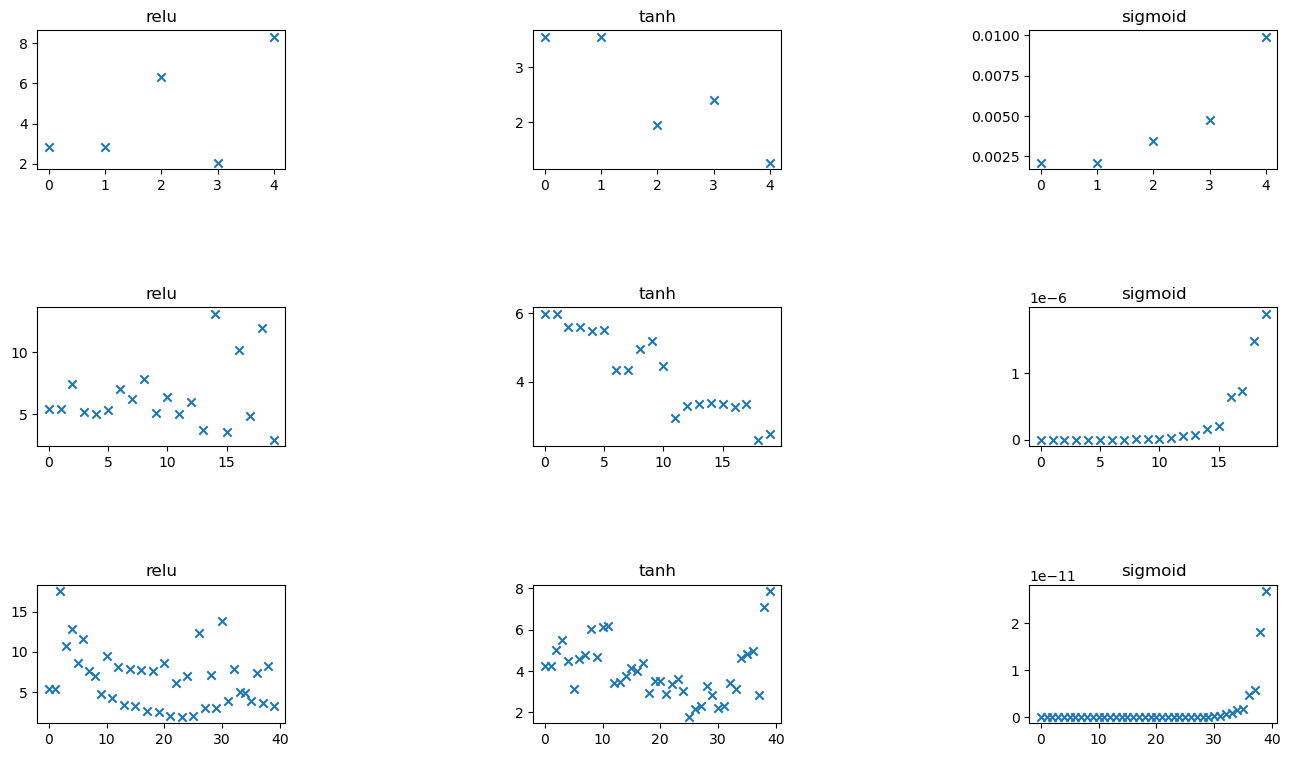

In [18]:
# Plot max gradients 
fig, axs = plt.subplots(3, 3, figsize=(16,9))
for x, layers in enumerate(gradientsDict):
    for y, activation_function in enumerate(gradientsDict[layers]):
        names = list(gradientsDict[layers][activation_function].keys())
        values = list(gradientsDict[layers][activation_function].values())
        axs[x, y].scatter(names, values, marker = "x")
        axs[x, y].set_title(activation_function)
plt.subplots_adjust(wspace=1,hspace=1)
plt.show()

In the plots above, we can see that relu and hyperbolic tangent have bigger max derivative values and so they change their weight values more in each iteration and also give higher max gradient values. Additionally, we can see that the max gradient values in sigmoid are extremely small and so the sigmoid does not have good accuracy because it updates the weights slower or sometimes it does not update them at all.

### Fourth Task

In [19]:
# Create custom activation function LeCun 
def custom_activation(x_train):
    return (1.7159 * K.tanh(2*x_train/3) + 0.01*x_train)

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

Number of layers: 5
Activation function: tanh
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1045 (Dense)          (None, 32)                25120     
                                                                 
 dense_1046 (Dense)          (None, 32)                1056      
                                                                 
 dense_1047 (Dense)          (None, 32)                1056      
                                                                 
 dense_1048 (Dense)          (None, 32)                1056      
                                                                 
 dense_1049 (Dense)          (None, 32)                1056      
                                                                 
 dense_1050 (Dense)          (None, 10)                330       
                                                                 
Total p

                                                                 
 dense_1077 (Dense)          (None, 10)                330       
                                                                 
Total params: 45,514
Trainable params: 45,514
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
938/938 [==============================] - 5s 4ms/step - loss: 0.7749 - accuracy: 0.7858 - val_loss: 0.4238 - val_accuracy: 0.8859
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3392 - accuracy: 0.9118 - val_loss: 0.2948 - val_accuracy: 0.9206
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2552 - accuracy: 0.9334 - val_loss: 0.2471 - val_accuracy: 0.9333
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2134 - accuracy: 0.9433 - val_loss: 0.2161 - val_accuracy: 0.9403
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1845 - accuracy: 0.951

 dense_1110 (Dense)          (None, 32)                1056      
                                                                 
 dense_1111 (Dense)          (None, 32)                1056      
                                                                 
 dense_1112 (Dense)          (None, 32)                1056      
                                                                 
 dense_1113 (Dense)          (None, 32)                1056      
                                                                 
 dense_1114 (Dense)          (None, 32)                1056      
                                                                 
 dense_1115 (Dense)          (None, 32)                1056      
                                                                 
 dense_1116 (Dense)          (None, 32)                1056      
                                                                 
 dense_1117 (Dense)          (None, 32)                1056      
          

 dense_1158 (Dense)          (None, 32)                1056      
                                                                 
 dense_1159 (Dense)          (None, 32)                1056      
                                                                 
 dense_1160 (Dense)          (None, 32)                1056      
                                                                 
 dense_1161 (Dense)          (None, 32)                1056      
                                                                 
 dense_1162 (Dense)          (None, 32)                1056      
                                                                 
 dense_1163 (Dense)          (None, 32)                1056      
                                                                 
 dense_1164 (Dense)          (None, 32)                1056      
                                                                 
 dense_1165 (Dense)          (None, 32)                1056      
          

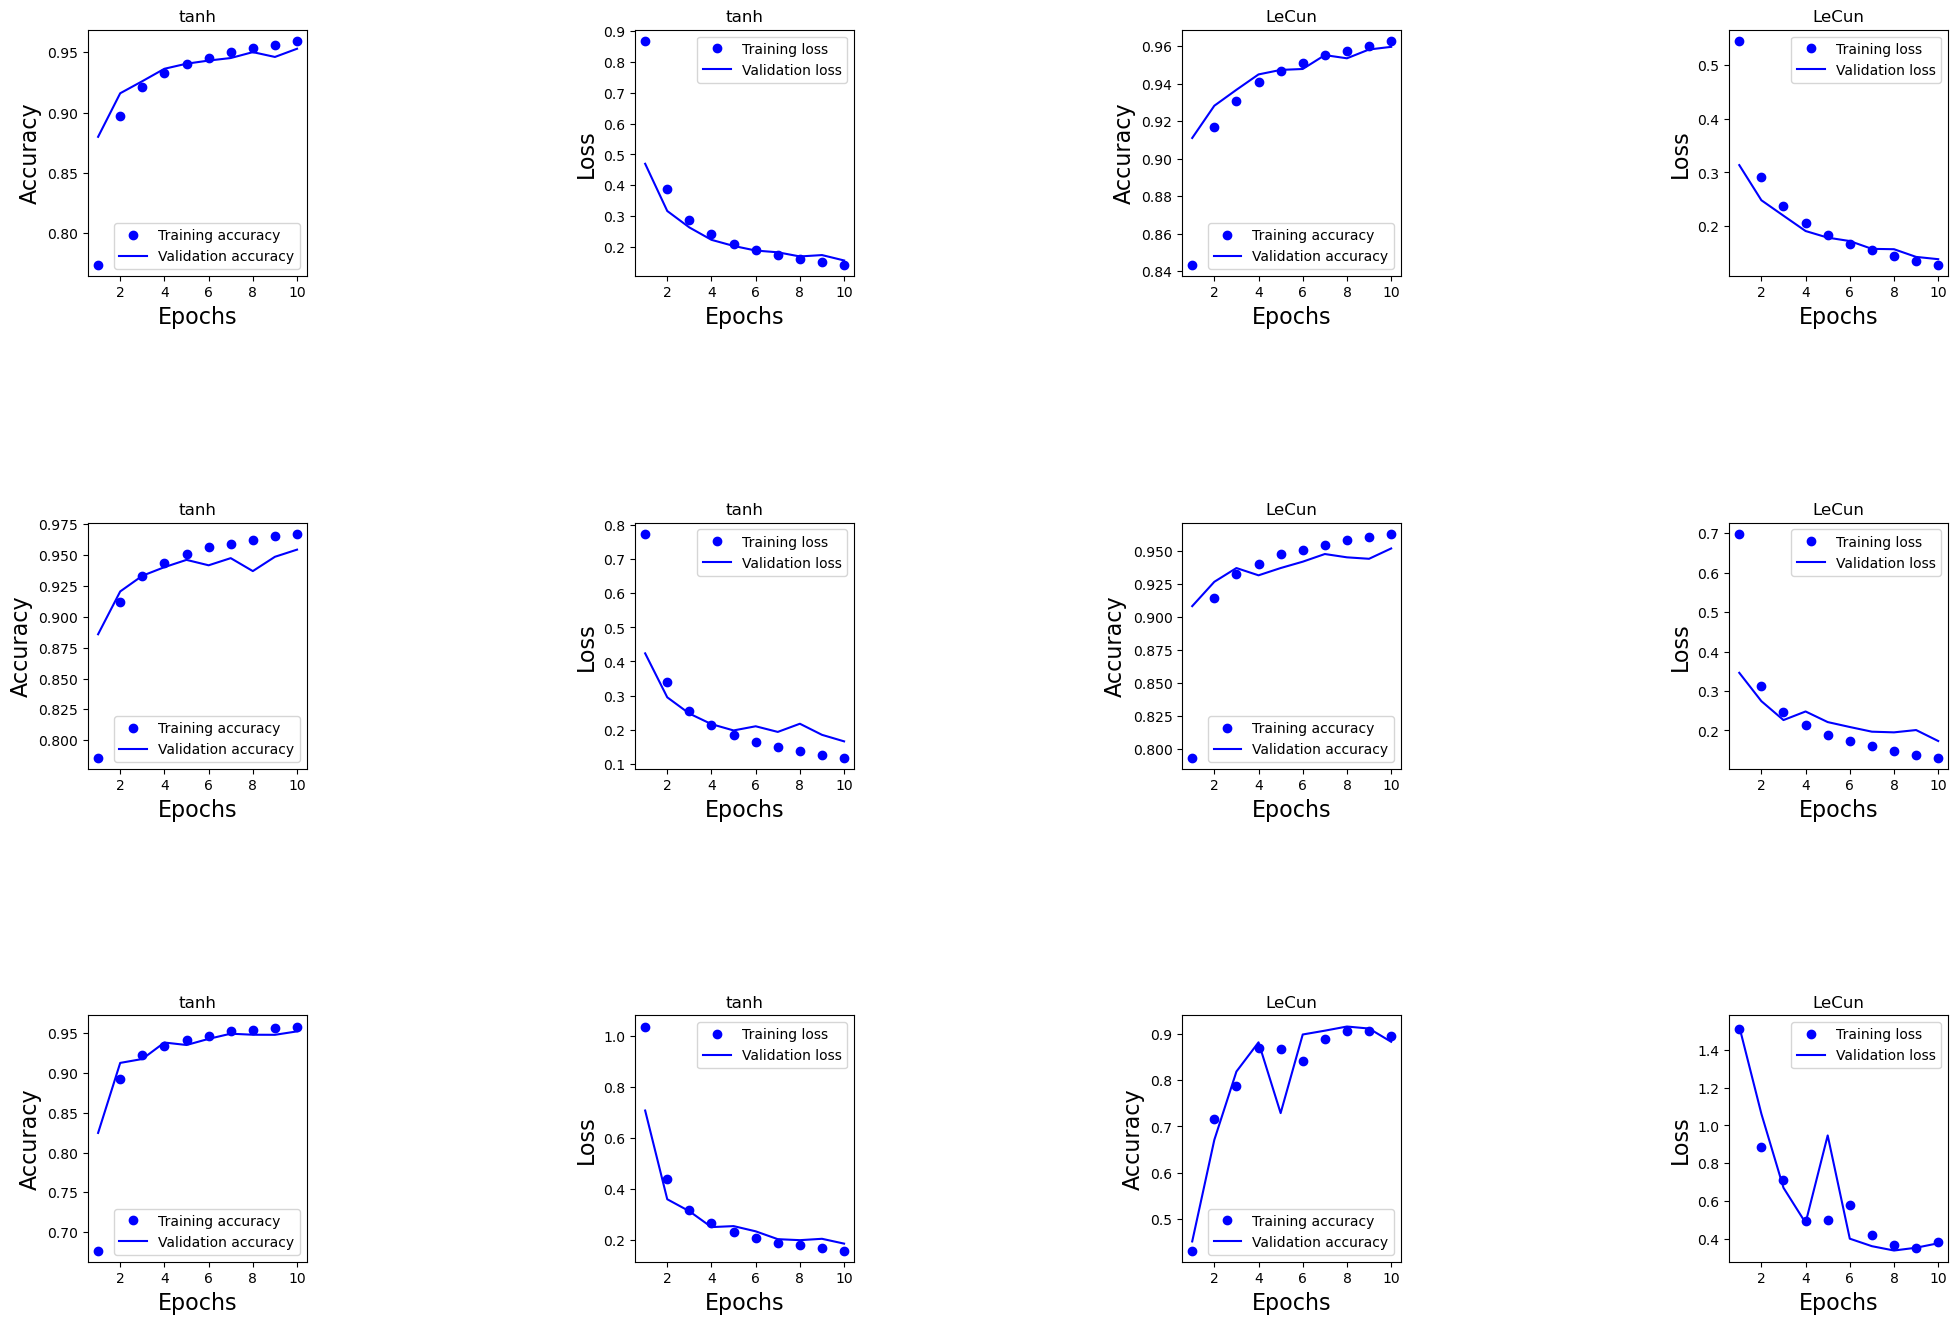

In [21]:
# Compare the learning curves of the models using LeCun and hyperbolic tangent activation functions
number_of_layers_list = [5,20,40]
activation_functions_list = ['tanh', 'LeCun']
gradientsDictD = {}

fig, ax = plt.subplots(3, 4, figsize=(24, 16))

for x, number_of_layers in enumerate(number_of_layers_list):
    y = 0
    func_gradients = {}
    for activation_function in activation_functions_list:
        print("Number of layers:", number_of_layers)
        print("Activation function:", activation_function)
        if activation_function == 'LeCun':
            history, model = train_model(X_train, y_train, number_of_layers, custom_activation, 10)
        else:
            history, model = train_model(X_train, y_train, number_of_layers, activation_function, 10)

        # calculate Gradients
        func_gradients[activation_function] = calculateLayersMaxGrad(model, number_of_layers)

        history_dict = history.history
        loss_values = history_dict['loss']
        val_loss_values = history_dict['val_loss']
        accuracy = history_dict['accuracy']
        val_accuracy = history_dict['val_accuracy']

        epochs = range(1, len(loss_values) + 1)

        #
        # Plot the model accuracy vs Epochs
        #
        ax[x,y].plot(epochs, accuracy, 'bo', label = 'Training accuracy')
        ax[x,y].plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
        ax[x,y].set_title(activation_function, fontsize = 12)
        ax[x,y].set_xlabel('Epochs', fontsize = 16)
        ax[x,y].set_ylabel('Accuracy', fontsize = 16)
        ax[x,y].legend()

        #
        # Plot the loss vs Epochs
        #
        ax[x,y+1].plot(epochs, loss_values, 'bo', label='Training loss')
        ax[x,y+1].plot(epochs, val_loss_values, 'b', label='Validation loss')
        ax[x,y+1].set_title(activation_function, fontsize=12)
        ax[x,y+1].set_xlabel('Epochs', fontsize=16)
        ax[x,y+1].set_ylabel('Loss', fontsize=16)
        ax[x,y+1].legend()
        y += 2

    gradientsDictD[number_of_layers] = func_gradients

plt.subplots_adjust(wspace=1.5,hspace=1)
plt.show()

It is clear that in both LeCun and tanh functions the validation accuracy in greater than training accuracy but in general both of them perform very well. However we should mention that in the 40-hidden-layer MLP, LeCun function somewhere about in the middle of the training, looses its accuracy.

In [22]:
# Print the Dictionary that Contains max gradients for each hidden layer of each activation function
gradientsDictD

{5: {'tanh': {0: 3.3246825,
   1: 3.3246825,
   2: 3.2904348,
   3: 2.1331735,
   4: 2.330033},
  'LeCun': {0: 5.080737,
   1: 5.080737,
   2: 5.3686805,
   3: 3.4531403,
   4: 5.0234632}},
 20: {'tanh': {0: 2.2733982,
   1: 2.2823486,
   2: 4.511201,
   3: 4.644549,
   4: 4.5666013,
   5: 4.763085,
   6: 4.551738,
   7: 4.799883,
   8: 3.974437,
   9: 4.5770955,
   10: 3.5292518,
   11: 3.6745625,
   12: 3.566972,
   13: 2.7126713,
   14: 2.609671,
   15: 2.5927672,
   16: 3.162624,
   17: 1.9647036,
   18: 2.764516,
   19: 2.6994312},
  'LeCun': {0: 6.8159294,
   1: 6.8159294,
   2: 10.420122,
   3: 6.4524636,
   4: 7.7215447,
   5: 4.3670945,
   6: 8.197397,
   7: 3.971401,
   8: 7.515992,
   9: 3.9630728,
   10: 6.999422,
   11: 4.133637,
   12: 6.928575,
   13: 2.549312,
   14: 6.4708066,
   15: 1.9634168,
   16: 5.594853,
   17: 2.4879634,
   18: 4.9593024,
   19: 1.9784936}},
 40: {'tanh': {0: 8.229925,
   1: 8.229925,
   2: 5.824783,
   3: 6.0127406,
   4: 8.613696,
   5: 9.346

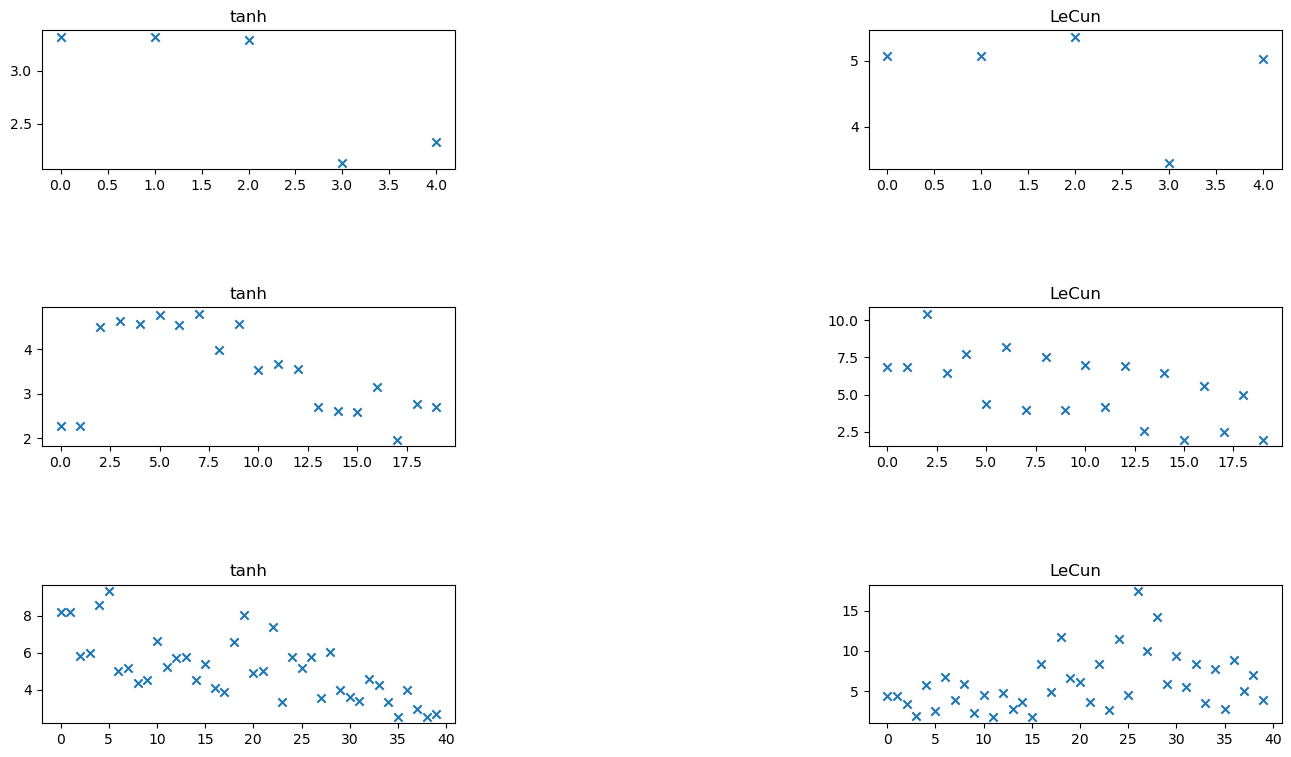

In [23]:
# Plot max gradients using LeCun and hyperbolic tangent activation functions
fig, axs = plt.subplots(3, 2, figsize=(16,9))
for x, layers in enumerate(gradientsDictD):
    for y, activation_function in enumerate(gradientsDictD[layers]):
        names = list(gradientsDictD[layers][activation_function].keys())
        values = list(gradientsDictD[layers][activation_function].values())
        axs[x, y].scatter(names, values, marker = "x")
        axs[x, y].set_title(activation_function)
plt.subplots_adjust(wspace=1,hspace=1)
plt.show()

We can see from the diagrams above that LeCun and tanh activation functions have similar max gradient values. However, in the 40-hidden-layer MLP tanh has higher max gradient values while LeCun has quite low max gradient values.

#### LeCun activation function backpropagation equations in general form

In [24]:
import numpy as np
class Βackprop_Network:
    def __init__(self, network_schema):
        self.network_schema = network_schema
        self.number_of_layers = len(network_schema) 
        self.Bn = [np.random.randn(l, 1) for l in network_schema[1:]]   
        self.Wn = [np.random.randn(l, next_l) for l, next_l in zip(network_schema[:-1], network_schema[1:])]
        
    def backprop(self, x, y):        
        მJⳆმBns = [np.zeros(b.shape) for b in self.Bn]
        მJⳆმWns = [np.zeros(W.shape) for W in self.Wn]

        Zn = [] 
        An = [] 
        for b, W in zip(self.Bn, self.Wn):
            z = W.T @ a + b if Zn else W.T @ x + b
            a = f(z)
            Zn.append(z)
            An.append(a)
        
        H = self.number_of_layers-2
        for L in range(H, -1, -1):
            δ =  f_prime(Zn[L]) * (self.Wn[L+1] @ δ) if L != H else e(An[L], y) * f_prime(Zn[L])
            მJⳆმBns[L] = δ
            მJⳆმWns[L] = An[L-1] @ δ.T if L != 0 else x @ δ.T
        
        return (მJⳆმBns, მJⳆმWns)
    
    def gradient_descent(self, mini_batch, factor):
        მJⳆმBn= [np.zeros(b.shape) for b in self.Bn]
        მJⳆმWn = [np.zeros(W.shape) for W in self.Wn]

        for x, y in mini_batch:
            მJⳆმBns, მJⳆმWns = self.backprop(x, y)
            მJⳆმBn = [მJⳆმb + მJⳆმbs for მJⳆმb, მJⳆმbs in zip(მJⳆმBn, მJⳆმBns)]  
            მJⳆმWn = [მJⳆმW + მJⳆმWs for მJⳆმW, მJⳆმWs in zip(მJⳆმWn, მJⳆმWns)]

        mini_batch_len = len(mini_batch)
        self.Wn = [W - factor/mini_batch_len * მJⳆმW for W, მJⳆმW in zip(self.Wn, მJⳆმWn)]
        self.Bn = [b - factor/mini_batch_len * მJⳆმb for b, მJⳆმb in zip(self.Bn, მJⳆმBn)]

def e(an, y):    
    return (an-y)                 #so we can easily change the cost.


def f(z):
    return (1.7159 * np.tanh(2*z/3) + 0.01*z)


def f_prime(z):
    return (1.14394 * np.power(1/np.cosh(2*z/3), 2) + 0.01)


backpropagation_network = Βackprop_Network([3, 2 ,2])
print("Initial Weights:")
print(backpropagation_network.Wn[0])
#the following generates a list of cnt vectors of length dim.
random_vectors = lambda dim, cnt: [np.random.rand(dim, 1) for i in range(cnt)]
random_batch= list(zip(random_vectors(3, 64) , random_vectors(2, 64)))
backpropagation_network.gradient_descent(random_batch, 3.0)
print("Optimized Weights:")
print(backpropagation_network.Wn[0])

Initial Weights:
[[-0.31007386 -0.69934065]
 [-1.15625009 -0.87234384]
 [ 1.50779171  0.32604965]]
Optimized Weights:
[[ 1.26503397 -1.0587995 ]
 [ 0.27379689 -1.27155882]
 [ 3.4108824  -0.01224052]]


The range of the gradients for LeCun activation function is [0, 1.15]

# Exercise 2

### First Task

In [25]:
# load dataset from mnist and normilize it
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train_conv = X_train
X_train_conv = X_train_conv.astype('float32')
X_test_conv = X_test
X_test_conv = X_test_conv.astype('float32')

# normalize our data
X_train_conv /= 255    
X_test_conv /= 255
classes = 10

# one-hot encode
y_train = to_categorical(y_train, classes)     
y_test = to_categorical(y_test, classes)

In [38]:
# Create and train our model for the convolution neural network
def train_convolutional_model(X_train, y_train, X_test, y_test, input_shape):
    Input = l.Input(shape=input_shape)
    hidden = l.Conv2D(32, (3,3), padding='same', activation="relu")(Input)
    hidden = l.MaxPooling2D((3,3))(hidden)
    hidden = l.Conv2D(64, (3,3), padding='same', activation="relu")(hidden)
    hidden = l.MaxPooling2D((3,3))(hidden)
    hidden = l.Conv2D(128, (3,3), padding='same', activation="relu")(hidden)
    hidden = l.MaxPooling2D((3,3))(hidden)
    hidden = l.Flatten()(hidden)
    output = l.Dense(10, activation='softmax')(hidden)

    classifier = m.Model(Input, output)
    classifier.summary()
    classifier.compile(
        loss='categorical_crossentropy',
        optimizer=tf.optimizers.Adam(),    
        metrics=["accuracy"]
      )

    classifier.fit(
        X_train,
        y_train,
        batch_size=128,
        epochs=50,
        validation_data=(X_test, y_test)
      )

    return classifier

In [39]:
shape_conv = (28, 28, 1) # declare the shape of the MNIST input 
classifier = train_convolutional_model(X_train_conv, y_train, X_test_conv, y_test, shape_conv)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         7385

Epoch 45/50
469/469 [==============================] - 23s 50ms/step - loss: 5.4909e-06 - accuracy: 1.0000 - val_loss: 0.0374 - val_accuracy: 0.9932
Epoch 46/50
469/469 [==============================] - 21s 45ms/step - loss: 4.5692e-06 - accuracy: 1.0000 - val_loss: 0.0376 - val_accuracy: 0.9932
Epoch 47/50
469/469 [==============================] - 24s 52ms/step - loss: 3.5287e-06 - accuracy: 1.0000 - val_loss: 0.0380 - val_accuracy: 0.9933
Epoch 48/50
469/469 [==============================] - 22s 48ms/step - loss: 2.9259e-06 - accuracy: 1.0000 - val_loss: 0.0390 - val_accuracy: 0.9934
Epoch 49/50
469/469 [==============================] - 20s 42ms/step - loss: 2.2657e-06 - accuracy: 1.0000 - val_loss: 0.0393 - val_accuracy: 0.9934
Epoch 50/50
469/469 [==============================] - 21s 44ms/step - loss: 1.7935e-06 - accuracy: 1.0000 - val_loss: 0.0394 - val_accuracy: 0.9933


### Second Task

In [40]:
# Define an Adversarial model which is a composite model of Convolution NN and MLP
def adversarial_model(classifier, shape, number_of_dimensions):
    classifier.trainable = False # disable training parameters for CNN

    Input = l.Input(shape=(1,))
    hidden = l.Dense(shape*shape*number_of_dimensions, activation="relu")(Input)
    hidden = l.Dense(shape*shape*number_of_dimensions, activation="sigmoid")(hidden)
    output = l.Reshape((shape, shape, number_of_dimensions))(hidden)

    advModel = m.Model(Input, output)
    advModel.summary()
    advModel.compile(
        loss='mean_squared_error',
        optimizer=tf.optimizers.Adam(learning_rate=0.01),
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

    wholeModel = m.Model(Input, classifier(output)) #combine the two models
    wholeModel.summary()
    wholeModel.compile(
        loss='categorical_crossentropy',
        optimizer=tf.optimizers.Adam(learning_rate=0.009),
        metrics=["accuracy"]
    )

    return advModel, wholeModel

In [41]:
shape_conv_mlp  = 28 
advModel, wholeModel = adversarial_model(classifier, shape_conv_mlp, 1)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_1186 (Dense)          (None, 784)               1568      
                                                                 
 dense_1187 (Dense)          (None, 784)               615440    
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 617,008
Trainable params: 617,008
Non-trainable params: 0
_________________________________________________________________
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None,

In [42]:
# prediction of noisy and original input
def predict(x_noise, x, predictor, img_shape, number_of_dimensions):
    # Get the data from the test set
    # Get output of network and prediction for noisy input
    activations_noise = predictor.predict(x_noise.reshape(1, img_shape, img_shape, number_of_dimensions))
    prediction_noise = np.argmax(activations_noise)
    # Get output of network and prediction for normal input
    activations = predictor.predict(x.reshape(1, img_shape, img_shape, number_of_dimensions))
    prediction = np.argmax(activations)
    
    fig, axs = plt.subplots(2, 2, figsize=(14, 8))
    
    # plot the images and the predictions
    if number_of_dimensions == 1:
        axs[0, 0].imshow(x_noise.reshape((img_shape,img_shape)), cmap='Greys')
    else:
        axs[0, 0].imshow(x_noise.reshape((img_shape,img_shape, number_of_dimensions)), cmap='Greys')
    axs[0, 0].set_title("Noise", fontsize=16)
    axs[0, 1].bar(range(10), activations_noise[0])
    axs[0, 1].set_title("Prediction of model", fontsize=16)

    if number_of_dimensions == 1:
        axs[1, 0].imshow(x.reshape((img_shape,img_shape)), cmap='Greys')
    else:
        axs[1, 0].imshow(x.reshape((img_shape,img_shape, number_of_dimensions)), cmap='Greys')
    axs[1, 0].set_title("original", fontsize=16)
    axs[1, 1].bar(range(10), activations[0])
    axs[1, 1].set_title("Prediction of model", fontsize=16)

    plt.subplots_adjust(wspace=0.25, hspace=0.5)
    plt.show()

In [43]:
# select favorite digits
fav_digits_x = {}
fav_digits_y = {}
for x,y in zip(X_train_conv[:50], y_train[:50]):
    if y[0] == 1 or y[2] == 1 or y[4] == 1 or y[6] == 1 or y[8] == 1:
        i = np.where(y == 1)[0][0]
        fav_digits_x[i] = x
        fav_digits_y[i] = y

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.65it/s]

1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 28ms/step


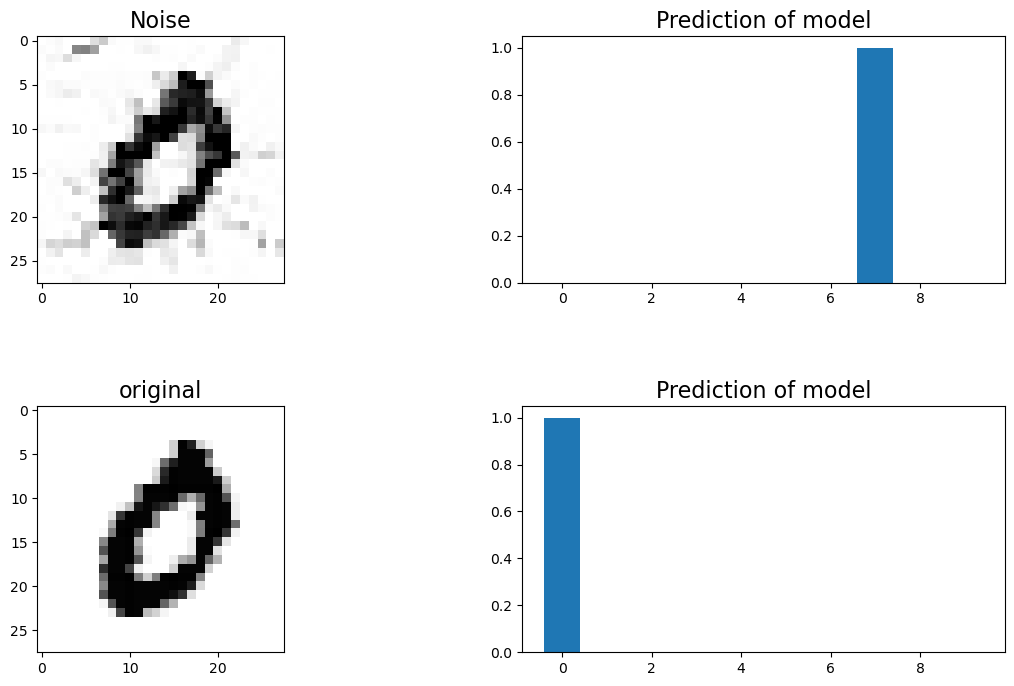

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.19it/s]

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 27ms/step


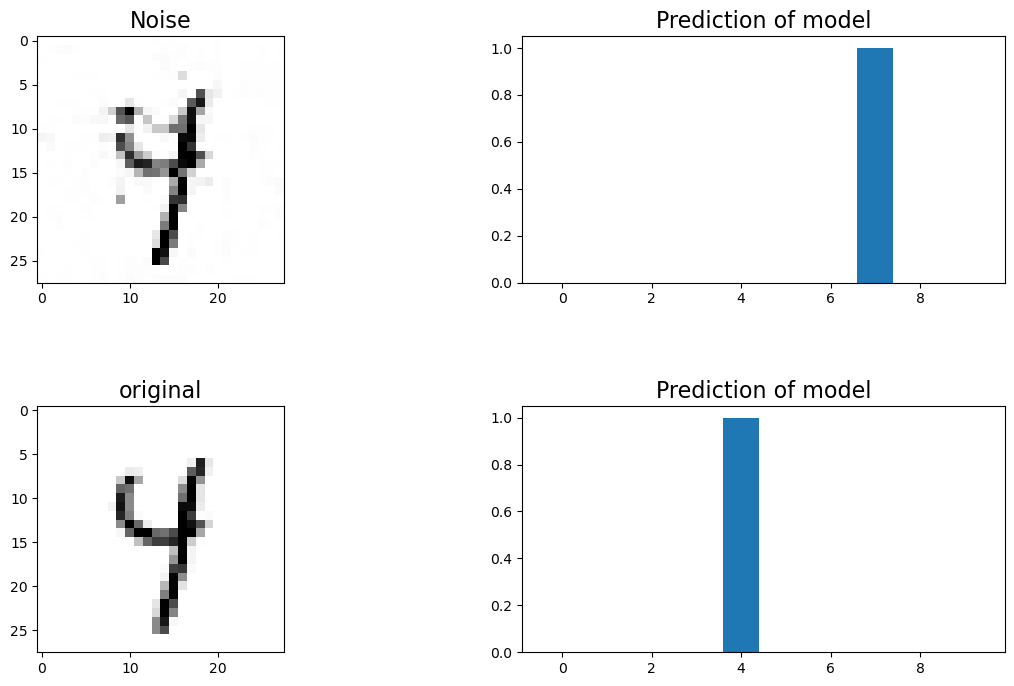

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 27.86it/s]


1/1 [==============================] - 0s 26ms/step


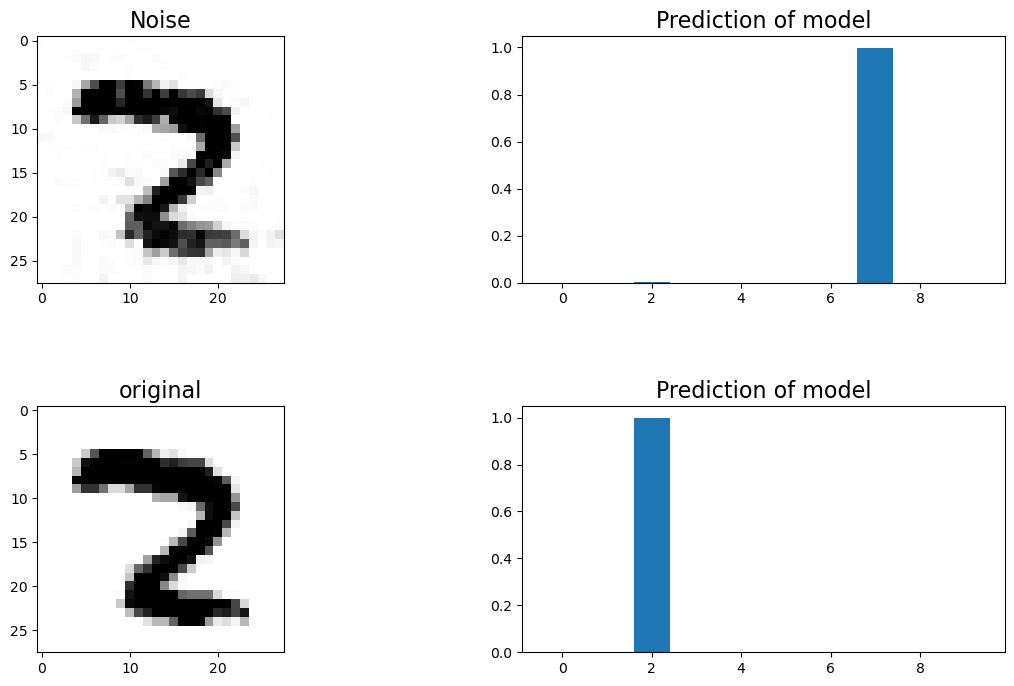

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 27.97it/s]

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 25ms/step


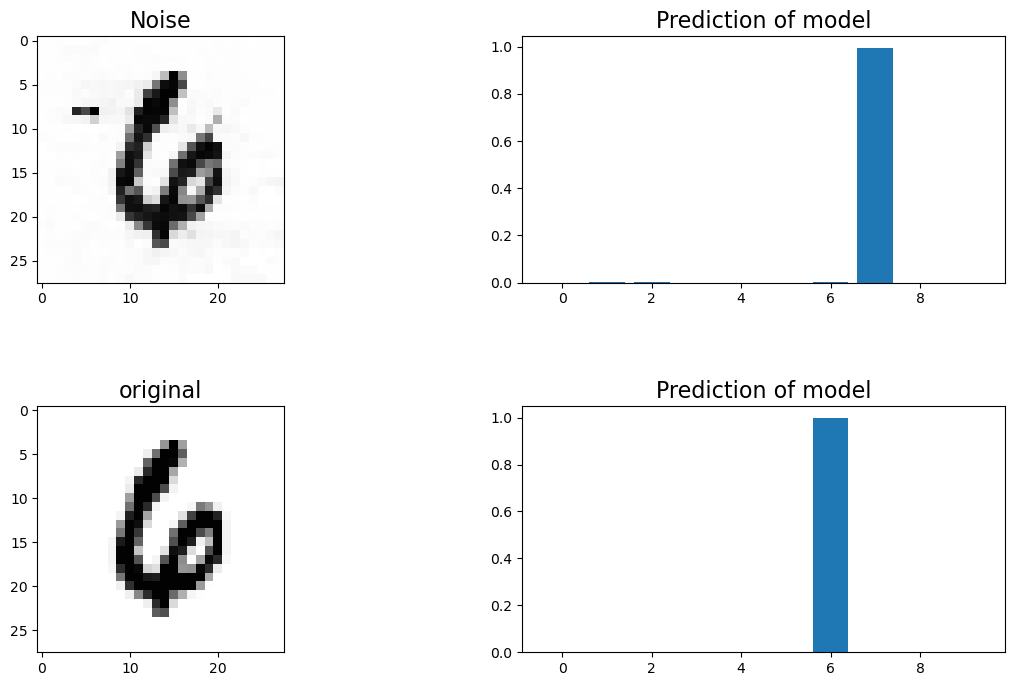

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.25it/s]


1/1 [==============================] - 0s 26ms/step


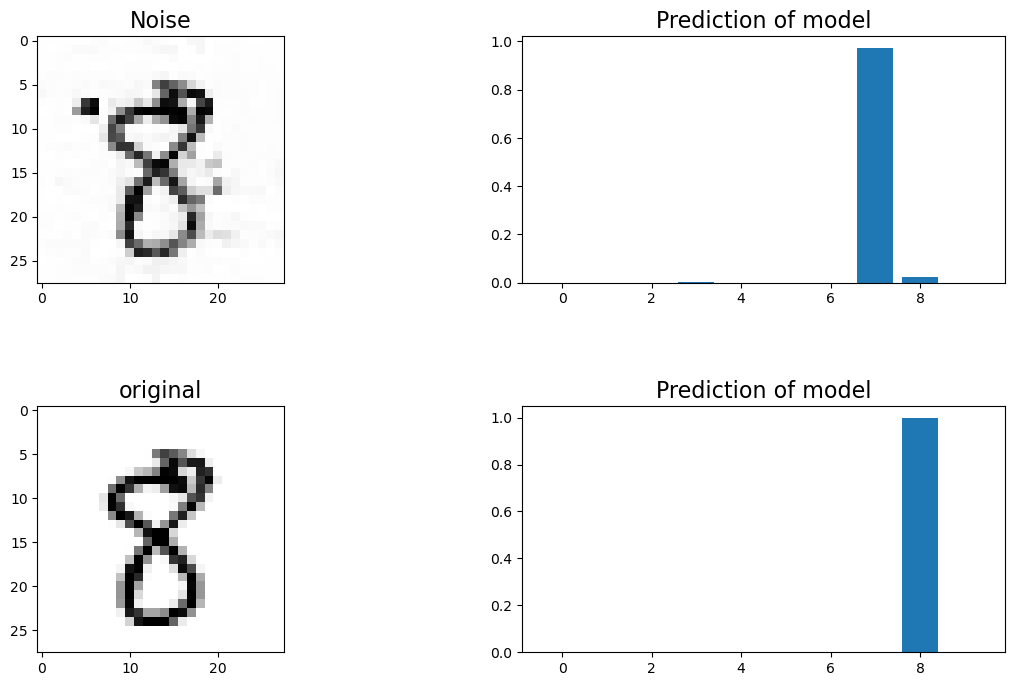

In [44]:
# train our model with noisy data and confuse to predict the wrong digit
for digit in fav_digits_x:
    for _ in tqdm(range(1000)):
        advModel.train_on_batch([np.array([1])], np.array([fav_digits_x[digit]]))
        wholeModel.train_on_batch([np.array([1])], np.array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]))
    advImage = advModel.predict([np.array([1])]).reshape(1, 28, 28, 1)
    predict(advImage, fav_digits_x[digit], classifier, 28, 1)

As we can see, after adding noise in our images and applying the adversarial model to confuse our model, our trained convolutional model predicts the wrong digit with (almost) 100% accuracy.

### Third Task

In [45]:
# load dataset from cifar10 and normilize it
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = tf.keras.datasets.cifar10.load_data()

X_train_cifar = X_train_cifar.astype('float32')     
X_test_cifar = X_test_cifar.astype('float32')     

# normalize our data
X_train_cifar /= 255    
X_test_cifar /= 255

# one-hot encode
y_train_cifar = to_categorical(y_train_cifar)     
y_test_cifar = to_categorical(y_test_cifar)

In [46]:
shape_cifar = (32, 32, 3) # declare the shape of the CIFAR10 input 
classifier_cifar = train_convolutional_model(X_train_cifar, y_train_cifar, X_test_cifar, y_test_cifar, shape_cifar)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 128)         7385

In [47]:
shape_advers = 32
advModel_cifar, wholeModel_cifar = adversarial_model(classifier_cifar, shape_advers, 3)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_1189 (Dense)          (None, 3072)              6144      
                                                                 
 dense_1190 (Dense)          (None, 3072)              9440256   
                                                                 
 reshape_2 (Reshape)         (None, 32, 32, 3)         0         
                                                                 
Total params: 9,446,400
Trainable params: 9,446,400
Non-trainable params: 0
_________________________________________________________________
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(N

In [51]:
# select a favorite image from CIFAR10
fav_image_x = X_train_cifar[21]
fav_image_y =  y_train_cifar[21]

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:44<00:00,  3.51it/s]

1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 22ms/step


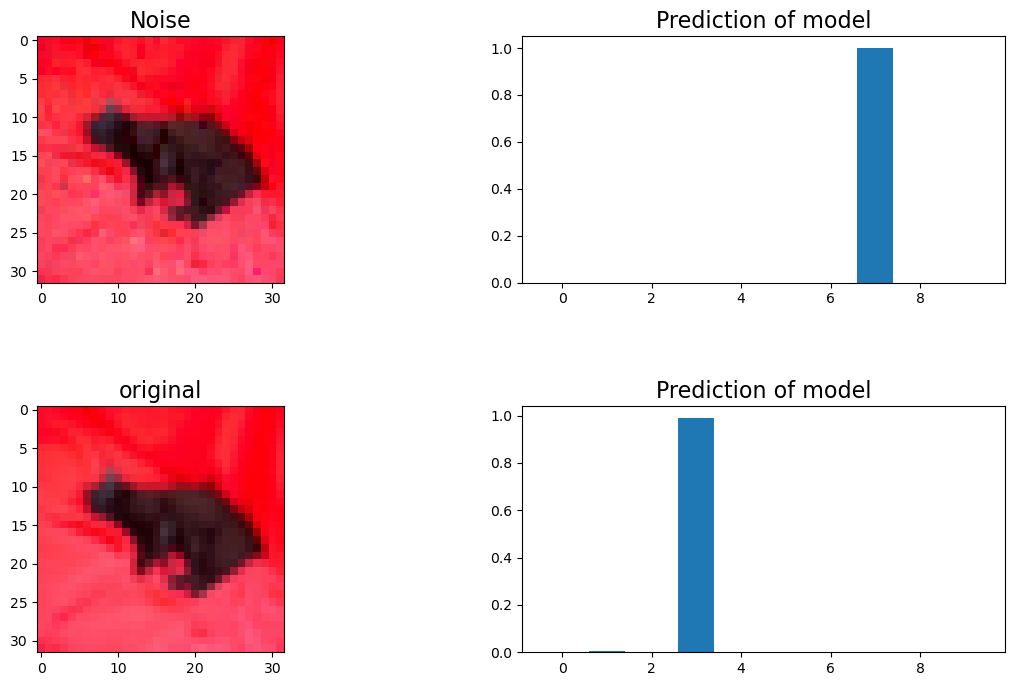

In [52]:
# train our model with noisy data and confuse to predict the wrong class
for _ in tqdm(range(1000)):
    advModel_cifar.train_on_batch([np.array([1])], np.array([fav_image_x]))
    wholeModel_cifar.train_on_batch([np.array([1])], np.array([y_train_cifar[52]]))
advImage_cifar = advModel_cifar.predict([np.array([1])]).reshape(1, 32, 32, 3)
predict(advImage_cifar, fav_image_x, classifier_cifar, 32, 3)
# 0: airplane
# 1: automobile
# 2: bird
# 3: cat
# 4: deer
# 5: dog
# 6: frog
# 7: horse
# 8: ship
# 9: truck

We can clearly see that after adding noise in our image and applying the adversarial model to confuse our model, our trained cifar convolutional model predicts the wrong image with (almost) 100% accuracy.